# Importing Basic libraries

In [28]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [18]:
data= pd.read_csv(r"C:\Users\sarth\OneDrive\Desktop\Machine Learning Kaggle\Simple Linear regression\code_LR_Teclov\Linear_ex1.csv")

In [20]:
len(data)

200

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [23]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


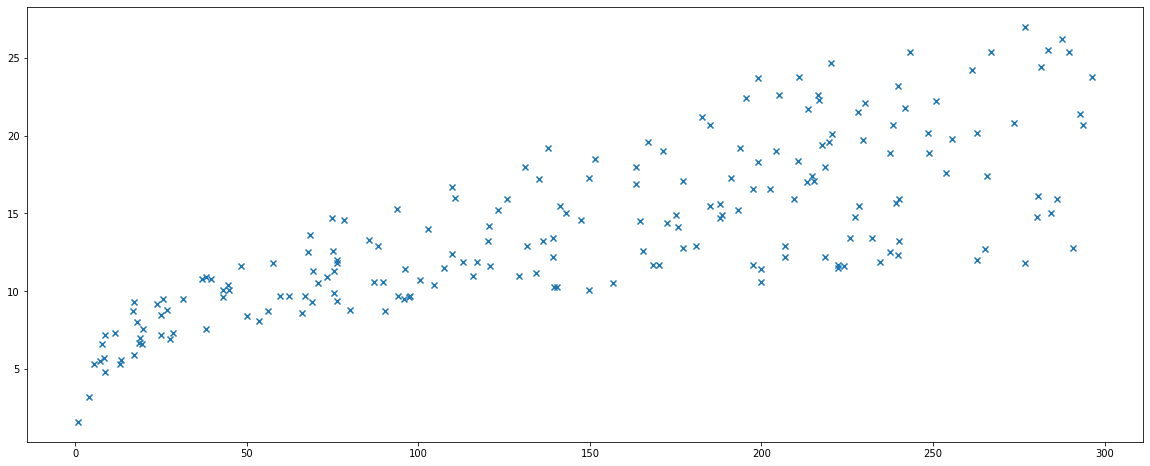

In [35]:
# Change the default figure size
plt.figure(figsize=(20,8))
# Change the default marker for the scatter from circles to x's
plt.scatter(data['TV'],data['Sales'],marker = 'x')

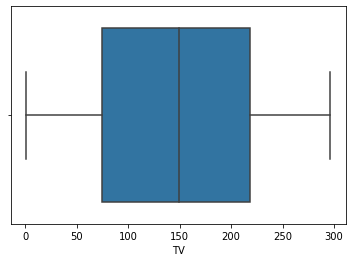

In [36]:
import seaborn as sns
sns.boxplot(x=data['TV'])

# Finding the outliers present in the dataframe 1) using z value, 2) using IQR

In [38]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
# print(z)

In [39]:
#keeping the threshold value for z =3 and finding the rows having outliers
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [41]:
#Finding the IQR value for the dataframe
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TV       144.450
Sales      7.025
dtype: float64


In [45]:
#check what values are out of the range of IQR values
check =data[(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))]
check

,TV,Sales
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195,NaN,NaN
196,NaN,NaN
197,NaN,NaN
198,NaN,NaN


# Removing outliers from the dataframe

In [50]:
#Taking only those points having z value less than 3
data = data[(z < 3).all(axis=1)]

In [56]:
#Removing those data points lying out of the IQR range
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape #This hsows the shape of the dataframe after removing outliers

(200, 2)

# Splitting dataset into Train and Test

In [62]:
train= data.iloc[:140,:]
test= data.iloc[140:,:]

or

#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)                                      

In [73]:
train_x= train['TV']
test_x= test['TV']

train_y= train['Sales']
test_y= test['Sales']

#This is the basic problem happend in linear regression using one Ind. variable
#This function contains two parameter. But it takes the first parameter as a 2D array.
#So, make sure your x is a 2D array or you can reshape your x using the below given command.
train_x= train_x.values.reshape(-1,1)
test_x= test_x.values.reshape(-1,1)

or 

#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

# X_train = X_train[:, np.newaxis]
# X_test = X_test[:, np.newaxis]

# Model formation and its application on test set

In [ ]:
model = LinearRegression()

In [75]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print(model.coef_, model.intercept_)

[0.04888181] 7.119875054812789


In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
predict= model.predict(train_x) #predicting values for the train set

In [102]:
rmse_train= mean_squared_error(train_y, predict)
rmse_train

9.71174514697894

In [103]:
r2_tr_pre= r2_score(train_y, predict)
r2_tr_pre

0.6476116735532351

In [81]:
future= model.predict(test_x) #predicting values for the test set

In [104]:
rmse_test= mean_squared_error(future,test_y )
rmse_test

12.696573082394833

In [105]:
r2_te_fu= r2_score(test_y, future)
r2_te_fu

0.5089778278176038

Text(0, 0.5, 'Sales')

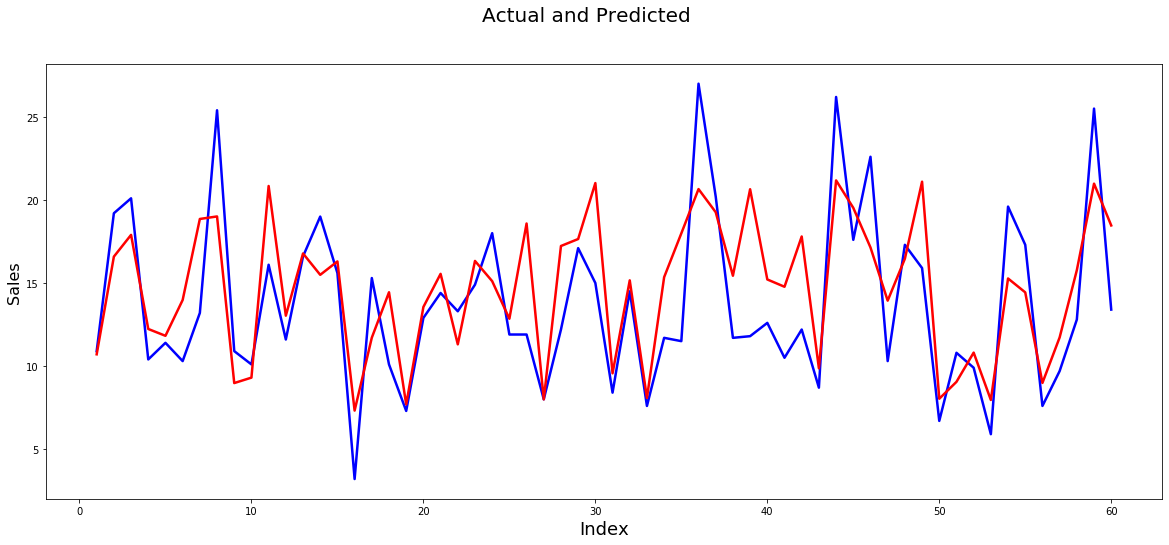

In [92]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,future, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'Sales')

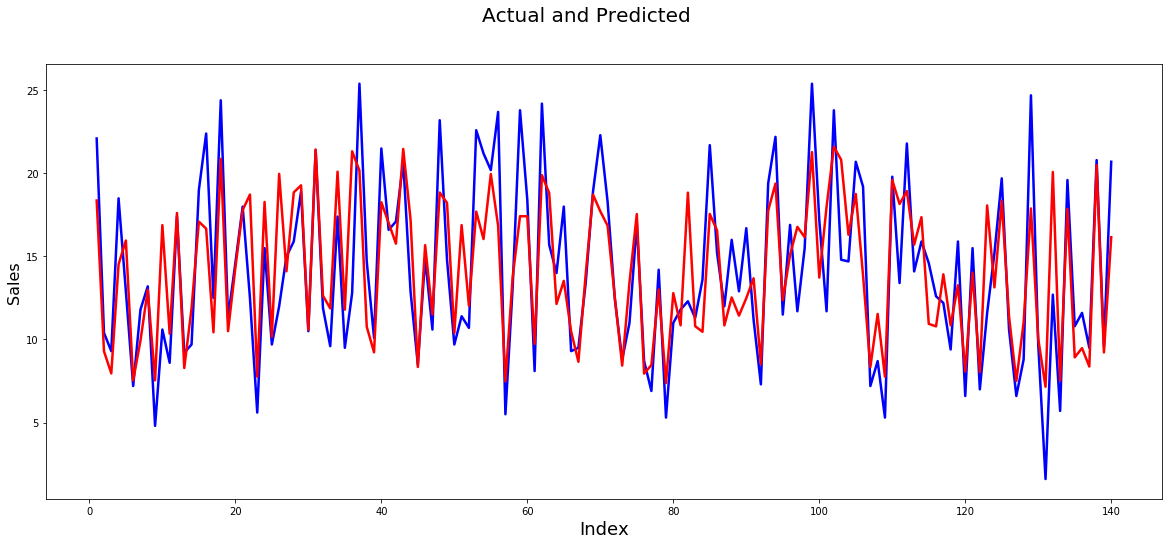

In [93]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,141,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,train_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

# Mean squared error and R2 score between test and predicted

In [108]:
mse= mean_squared_error(test_y, future)
print(mse)
r_square= r2_score(test_y, future)
print(r_square)

12.696573082394833
0.5089778278176038


Sales= Tv*(0.04888181)+ 7.119875054812789

# Check for the Normality: Graphical method

# Using Box Plot

In [116]:
# These are methods for plotting the data and qualitatively evaluating whether the data looks Gaussian.

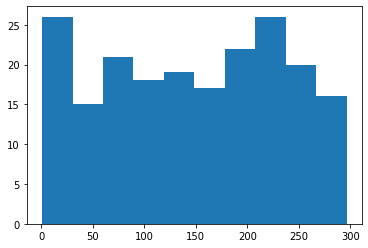

In [111]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# histogram plot
pyplot.hist(data['TV'])
pyplot.show()

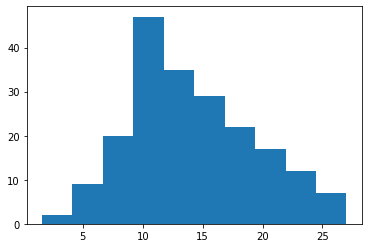

In [113]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# histogram plot
pyplot.hist(data['Sales'])
pyplot.show()

# Q-Q Plot Line

In [ ]:
# A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. 
# Often a line is drawn on the plot to help make this expectation clear. 
# Deviations by the dots from the line shows a deviation from the expected distribution.

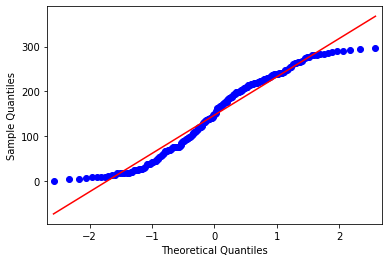

In [114]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(data['TV'], line='s')
pyplot.show()

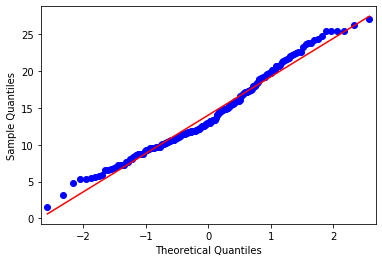

In [115]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(data['Sales'], line='s')
pyplot.show()